In [2]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv("data/datathon_data.csv")
categorical_cols = ["WAERS", "BUKRS", "KTOSL", "PRCTR", "BSCHL", "HKONT"]


# Get rare values
How do they relate to anomalies

In [4]:
import pandas as pd

def compute_anomaly_ratios(df, categorical_cols = categorical_cols, label_col='label', anomaly_value='anomal'):
    info = {}
    
    for col in categorical_cols:
        grouped = df.groupby(col)
        ratio = grouped[label_col].value_counts(normalize=True).unstack().fillna(0).get(anomaly_value, 0)
        info[col] = pd.DataFrame({"ratio": ratio, "n_unique": df.groupby(col).size()}).reset_index()
        info[col] = info[col].rename(columns={col: "value"})
        info[col]["variable"] = col
        
    anomyly_ratios = pd.concat(info.values(), axis=0, ignore_index=True)
    return anomyly_ratios

# Example usage
categorical_columns = ["WAERS", "BUKRS", "KTOSL", "PRCTR", "BSCHL", "HKONT"]
anomyly_ratios = compute_anomaly_ratios(df, categorical_columns)


In [5]:
all_anomaly_1val = anomyly_ratios[anomyly_ratios.ratio == 1]
all_anomaly_1val.variable.unique()
all_anomaly_1val[all_anomaly_1val.n_unique > 1]

#anomyly_ratios[(anomyly_ratios.ratio > 0.5) & (anomyly_ratios.ratio < 1)]
rare_values = anomyly_ratios[anomyly_ratios.n_unique < 10]


all rare values are in anomaly transtaction

how many anomalies are there that don't contain rare values?
only 30

In [6]:
# remove rare
df_no_rare = df.copy()
for _,r in rare_values.iterrows():
    df_no_rare = df_no_rare[df_no_rare.get(r.variable) != r.value]

df_anomal = df[df.label == "anomal"]
df_no_rare_anomal = df_anomal.copy()
for _,r in rare_values.iterrows():
    df_no_rare_anomal = df_no_rare_anomal[df_no_rare_anomal.get(r.variable) != r.value]

In [7]:
compute_anomaly_ratios(df_no_rare_anomal, categorical_cols).sort_values(by = "n_unique", ascending= False)

,value,ratio,n_unique,variable
0,C1,1.0,30,WAERS
4,C1,1.0,30,KTOSL
35,A1,1.0,30,BSCHL
36,B1,1.0,30,HKONT
1,C11,1.0,28,BUKRS
3,C20,1.0,1,BUKRS
2,C17,1.0,1,BUKRS
5,C18,1.0,1,PRCTR
6,C20,1.0,1,PRCTR
9,C26,1.0,1,PRCTR


## Are BURKS (Currency) and Currency (WAERS) related like they should? 
all that aren't are anomalies

In [8]:
df.loc[df["BUKRS"].str.slice(0,2) != df["WAERS"]].groupby("label").count()

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR
label,,,,,,,,,
anomal,71,71,71,71,71,71,71,71,71


In [9]:
df_burks_waers_match = df_no_rare.loc[df_no_rare["BUKRS"].str.slice(0,2) == df_no_rare["WAERS"]]
df_burks_waers_match.shape

(532938, 10)

In [10]:
compute_anomaly_ratios(df_burks_waers_match).sort_values(by = "n_unique", ascending= False)

,value,ratio,n_unique,variable
198,A1,0.000079,367346,BSCHL
201,B1,0.000088,330272,HKONT
0,C1,0.000105,275330,WAERS
99,C1,0.000105,275104,KTOSL
203,B3,0.000000,119726,HKONT
...,...,...,...,...
161,C63,0.000000,2604,PRCTR
172,C74,0.000000,2591,PRCTR
192,C94,0.000000,2590,PRCTR
150,C52,0.000000,2576,PRCTR


## Relations of Numerical values to anomaly

In [11]:
df_burks_waers_match

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,0,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,4,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
...,...,...,...,...,...,...,...,...,...,...
533004,533004,C1,C18,C3,C32,A1,B2,2501589.15,0.00,regular
533005,533005,C8,C80,C1,C11,A1,B1,390076.18,12065.45,regular
533006,533006,C1,C10,C1,C19,A1,B1,192147.38,326823.09,regular
533007,533007,C1,C14,C4,C40,A1,B3,870539.68,0.00,regular


In [12]:
index_high = df[df['label'] == 'regular'][['DMBTR', 'WRBTR']].prod(axis=1).sort_values(ascending = False)[1:20].index
df.iloc[index_high]
#df_burks_waers_match[['DMBTR', 'WRBTR']].prod(axis=1).sort_values()

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
236394,236394,C7,C72,C1,C13,A3,B1,10000000.0,57316255.05,regular
71811,71811,C5,C59,C1,C19,A3,B1,10000000.0,50399045.08,regular
449918,449918,C1,C15,C1,C10,A1,B1,10000000.0,49585040.37,regular
483430,483430,C5,C50,C2,C27,A3,B3,10000000.0,47316255.05,regular
275309,275309,C7,C78,C4,C49,A3,B3,10000000.0,45674547.89,regular
36767,36767,C5,C57,C6,C67,A3,B2,10000000.0,44892193.09,regular
193465,193465,C7,C79,C2,C26,A3,B3,10000000.0,42542664.27,regular
383728,383728,C1,C13,C9,C97,A1,B1,10000000.0,40399045.08,regular
100769,100769,C1,C16,C1,C19,A1,B1,10000000.0,39585040.37,regular
207617,207617,C3,C31,C2,C20,A3,B3,10000000.0,37670038.08,regular


no direct relationship

there are some variables which have only 1 unique value. Look at distribution with those

In [13]:
one_unique_cols = df_burks_waers_match.columns[df_burks_waers_match.nunique() == 1]
#one_unique_cols = one_unique_cols.drop("label")

# Step 2: Get the unique value of each of those columns
unique_values = df_burks_waers_match[one_unique_cols].iloc[0]

In [14]:
df_like_unique_anomal = df.copy()

for id, val in unique_values.items():
    df_like_unique_anomal = df_like_unique_anomal[df_like_unique_anomal.get(id) == val]

In [15]:
df_like_unique_anomal

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,0,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,4,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
...,...,...,...,...,...,...,...,...,...,...
533004,533004,C1,C18,C3,C32,A1,B2,2501589.15,0.00,regular
533005,533005,C8,C80,C1,C11,A1,B1,390076.18,12065.45,regular
533006,533006,C1,C10,C1,C19,A1,B1,192147.38,326823.09,regular
533007,533007,C1,C14,C4,C40,A1,B3,870539.68,0.00,regular


In [16]:
df_like_unique_anomal[df_like_unique_anomal.BUKRS == "C17"]

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
23,23,C1,C17,C2,C20,A1,B3,2663942.99,0.0,regular
28,28,C1,C17,C1,C10,A1,B1,130137.21,0.0,regular
62,62,C1,C17,C1,C17,A1,B1,488352.98,0.0,regular
69,69,C1,C17,C2,C25,A1,B3,23521.26,0.0,regular
70,70,C1,C17,C8,C81,A1,B3,167028.62,0.0,regular
...,...,...,...,...,...,...,...,...,...,...
532769,532769,C1,C17,C1,C10,A1,B1,263898.22,0.0,regular
532776,532776,C1,C17,C4,C45,A1,B3,772175.76,0.0,regular
532777,532777,C1,C17,C2,C29,A1,B3,194806.87,0.0,regular
532820,532820,C1,C17,C2,C21,A1,B3,1064912.56,19873.0,regular


In [17]:
df_like_unique_anomal[df_like_unique_anomal['label'] == 'regular'][['DMBTR', 'WRBTR']].prod(axis=1).sort_values(ascending = False)

#df_burks_waers_match[['DMBTR', 'WRBTR']].prod(axis=1).max

497461    5.958504e+14
236394    5.731626e+14
71811     5.039905e+14
449918    4.958504e+14
483430    4.731626e+14
              ...     
20        0.000000e+00
532977    0.000000e+00
532979    0.000000e+00
532981    0.000000e+00
532970    0.000000e+00
Length: 532909, dtype: float64

is there anything just once?

## Create training data
 

In [18]:
# load
from get_ids import get_ids_of_easy_outliers, get_1_vals_per_col

ids_to_remove = get_ids_of_easy_outliers(df)

df_drop = df.drop(index = ids_to_remove, columns=['BELNR'])

df_anomal_hard = df_drop[df_drop.label == "anomal"]
df_regular = df_drop[df_drop.label == "regular"]

In [19]:
df_anomal_hard.get(categorical_cols[0])

32317     C1
34058     C1
34059     C1
43399     C1
97954     C1
144286    C1
170320    C1
183064    C1
213105    C1
220927    C1
234335    C1
234460    C1
300115    C1
306995    C1
318771    C1
326531    C1
352339    C1
359776    C1
360246    C1
364695    C1
365737    C1
387059    C1
421175    C1
431719    C1
462643    C1
463973    C1
502056    C1
507636    C1
532375    C1
Name: WAERS, dtype: object

In [20]:
# get cols where only 1 value
def get_single_value(col):
    values = col.unique()
    if len(values) == 1:        
            return values[0]
    
single_vals = {c: get_single_value(df_anomal_hard.get(c)) for c in categorical_cols}    


In [21]:
# where are rare vals

list_reduce_by_and = []
for n,v in single_vals.items():
    list_reduce_by_or = []
    if v is not None:
        list_reduce_by_or.append(df_regular.get(n) == v)
    if len(list_reduce_by_or) > 0:
        list_reduce_by_and.append(reduce(lambda x, y: x | y, list_reduce_by_or))

indices_anomaly_lookalike = reduce(lambda x, y: x & y, list_reduce_by_and)

In [22]:
df_anomaly_lookalike = df_regular[indices_anomaly_lookalike]

# Test found rules

rules without money

In [127]:
display(df[(df.PRCTR == "C20") & ((df.HKONT == "B1"))])

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
213105,213105,C1,C17,C1,C20,A1,B1,910664.385738,54436.897572,anomal


In [ ]:
def get_buks_mask(df):
    return(df.BUKRS == "C17") | (df.BUKRS == "C11")

In [128]:
def get_wrbtr_mask(df):
    return (df.WRBTR > 54423) & (df.WRBTR < 54478)

def get_dmbtr_mask(df):
    return (df.DMBTR > 910631) & (df.DMBTR < 910677)

def get_money_masks(df):
    return(get_wrbtr_mask(df) & get_dmbtr_mask(df))

display(df[get_money_masks(df)])

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
12939,12939,C1,C20,C1,C18,A1,B1,910658.284578,54449.838820,anomal
32317,32317,C1,C11,C1,C53,A1,B1,910653.005238,54439.211421,anomal
34058,34058,C1,C11,C1,C91,A1,B1,910668.887465,54440.856583,anomal
34059,34059,C1,C11,C1,C64,A1,B1,910631.632279,54443.283794,anomal
43399,43399,C1,C11,C1,C79,A1,B1,910650.440131,54435.055247,anomal
97954,97954,C1,C11,C1,C68,A1,B1,910648.636111,54442.618111,anomal
144286,144286,C1,C11,C1,C76,A1,B1,910645.076191,54448.440199,anomal
170320,170320,C1,C11,C1,C30,A1,B1,910645.965114,54452.809780,anomal
183064,183064,C1,C11,C1,C82,A1,B1,910648.873494,54436.705575,anomal
213105,213105,C1,C17,C1,C20,A1,B1,910664.385738,54436.897572,anomal


look at money distribution

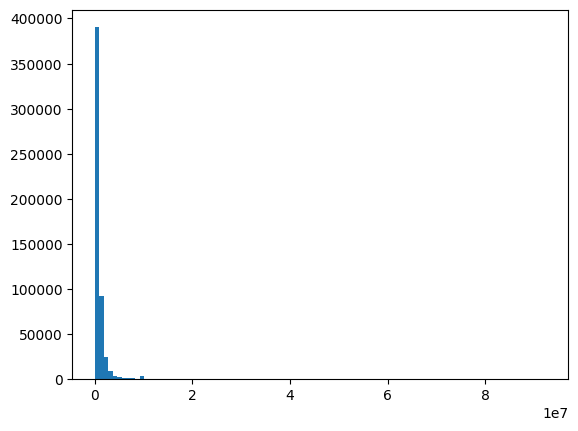

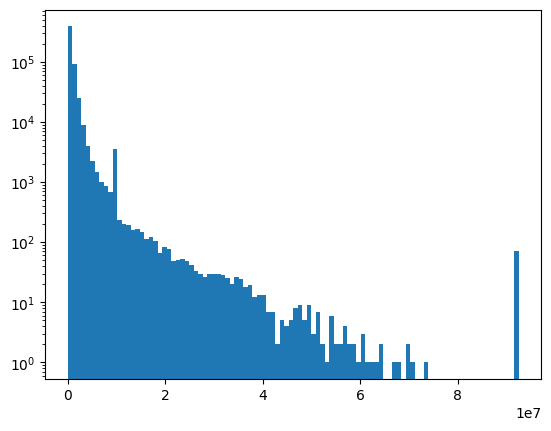

In [26]:
plt.hist(df.DMBTR, bins = 100)
plt.show()
plt.hist(df.DMBTR, bins = 100)
plt.yscale('log')


In [27]:
bins = np.arange(min(df.DMBTR), max(df.DMBTR) + 100, 100)
hist, bin_edges = np.histogram(df.DMBTR, bins=bins)
fullest_bin_index = np.argmax(hist)
fullest_bin_index

np.int64(99999)

In [28]:
bins = np.arange(min(df.WRBTR), max(df.WRBTR) + 100, 100)
hist, bin_edges = np.histogram(df.WRBTR, bins=bins)
fullest_bin_index = np.argmax(hist)
fullest_bin_index

np.int64(0)

# Make plots for presentation

In [107]:
df_regular_less = df_regular[(df_regular.DMBTR >= (df_anomal_hard.DMBTR.min() - 50)) & (df_regular.DMBTR < df_anomal_hard.DMBTR.min())].sort_values(by = "DMBTR").iloc[1]
df_regular_more = df_regular[(df_regular.DMBTR <= (df_anomal_hard.DMBTR.max() + 50)) & (df_regular.DMBTR > df_anomal_hard.DMBTR.max())].sort_values(by = "DMBTR", ascending = True).iloc[1]
df_canvas = df_anomal_hard.copy().reset_index()
df_canvas.loc[len(df_canvas)] = df_regular_more
df_canvas.loc[len(df_canvas)] = df_regular_less
df_canvas = df_canvas[["DMBTR", "label"]].sort_values(by = "DMBTR").reset_index(drop=True)
df_canvas.to_csv("data/df_money_canvas.CSV", index= None)

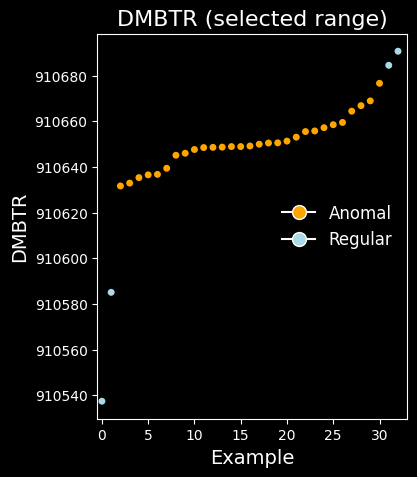

In [121]:
# Set up the plot
from matplotlib.lines import Line2D

plt.style.use('dark_background')  # Set the background to black

fig, ax = plt.subplots(figsize=(4, 5))

# Set color based on the 'label' column
colors = df_canvas['label'].map({'anomal': 'orange', 'regular': 'lightblue'})

ax.scatter(df_canvas.index, df_canvas['DMBTR'], c=colors, edgecolors='black')

# Label the axes
ax.set_xlabel("Example", fontsize=14, color='white')
ax.set_ylabel("DMBTR", fontsize=14, color='white')

# Set x-axis to range from 0 to len(df)
ax.set_xlim(-0.5, len(df_canvas))

# Set title
ax.set_title("DMBTR (selected range)", fontsize=16, color='white')

# Show grid and adjust its color for better visibility
ax.grid(False)

legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Anomal'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Regular')]

# Add the legend to the plot
ax.legend(handles=legend_labels, loc='right', fontsize=12, facecolor='black', frameon=False)


# Show the plot
plt.savefig("fig/DMBTR.png")
